In [1]:
!pip install smplx[all] # https://github.com/vchoutas/smplx
!pip install chumpy
!pip uninstall numpy -y
!pip install numpy==1.23.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.1 MB/s eta 0:00:00
   ━

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import smplx
import numpy as np
import torch
import trimesh

/usr/local/lib/python3.11/dist-packages/trimesh/grouping.py:15: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.2)
  from scipy.spatial import cKDTree


In [5]:

np.__version__

'1.23.2'

In [8]:
# G-Drive Link: https://drive.google.com/drive/folders/1ODwGQtDLyuQMyeuoaLhelrn96z62sRRr?usp=sharing
https://drive.google.com/file/d/13lgnrpJDWsXHvMmkwDQ0uVOzTWcoHmSv/view?usp=share_link

# Create a copy of this, or do "Add as shortcut"

SyntaxError: invalid decimal literal (ipython-input-8-714497542.py, line 2)

In [9]:
from google.colab import drive
drive.mount('/content/drive')
# 1. Go to G-Drive Link (If link not visible, see disscord, or reload notebook)
# 2. In G-Drive, do "Organize -> Add shortcut"
# 3. Modify model_folder path below if needed. (Part till "/content/drive/MyDrive" will remain same. Edit after that)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Initialize  Model

In [10]:
# ⚠️ Run this cell in Colab
!sed -i 's/inspect\.getargspec/inspect.getfullargspec/' /usr/local/lib/python3.11/dist-packages/chumpy/ch.py

In [11]:
model_folder = '/content/drive/MyDrive/SMPL/smpl_model.pkl' # Modify path as per your directory structure
# Download model from: https://smpl.is.tue.mpg.de/; Might need renaming
model_type = 'smpl'
gender = 'neutral'
num_betas = 10
# num_joints=23
# body_pose = torch.zeros([1, num_joints * 3])

model = smplx.create(model_folder, model_type=model_type, gender=gender, num_betas=num_betas)
print(model)

AssertionError: Path /content/drive/MyDrive/SMPL/smpl_model.pkl does not exist!

### Get Mesh in Rest Pose

In [ ]:
def get_smpl_mesh(betas=None, body_pose=None, global_orient=None):
    output = model(betas=betas, return_verts=True, body_pose=body_pose, global_orient=global_orient)
    # print(output)

    vertices = output.vertices.detach().cpu().numpy().squeeze()
    joints = output.joints.detach().cpu().numpy().squeeze()

    # print('Vertices shape =', vertices.shape)
    # print('Joints shape =', joints.shape)
    mesh_out = trimesh.Trimesh(vertices, model.faces) # Notice
    return mesh_out


In [ ]:
betas = torch.zeros([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
_ = mesh_out.export("smpl.obj") # Dump
mesh_out.show()


### Shape Variations

In [ ]:
betas = torch.ones([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
_ = mesh_out.export("smpl1.obj") # Dump
mesh_out.show()


In [ ]:
betas = torch.rand([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
_ = mesh_out.export("smpl2.obj") # Dump
mesh_out.show()


In [ ]:
betas = torch.ones([1,10]) * 100
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
_ = mesh_out.export("smpl3.obj") # Dump
mesh_out.show()

### Pose Variations

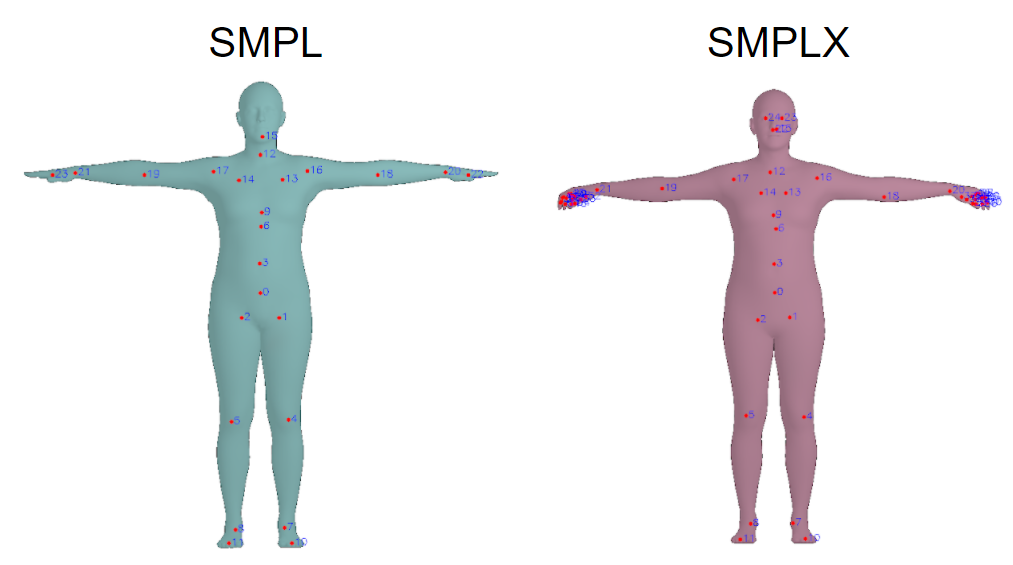

Image Source: https://github.com/facebookresearch/frankmocap/issues/91

### Exercise

In [ ]:
betas = torch.zeros([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
body_pose[:, 6] = np.pi/2
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
# _ = mesh_out.export("smpl3.obj") # Dump
mesh_out.show()

In [ ]:
betas = torch.zeros([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
body_pose[:, 7] = np.pi/2
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
# _ = mesh_out.export("smpl3.obj") # Dump
mesh_out.show()

In [ ]:
betas = torch.zeros([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
body_pose[:, 8] = np.pi/2
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose)
# _ = mesh_out.export("smpl3.obj") # Dump
mesh_out.show()

In [ ]:
betas = torch.zeros([1,10])
num_joints = 23
body_pose = torch.zeros([1, num_joints*3])
global_orient = torch.zeros(1, 3)
global_orient[:, 2] = np.pi/2
mesh_out = get_smpl_mesh(betas=betas, body_pose=body_pose, global_orient=global_orient)
mesh_out.show()

### Next Notebook
https://tinyurl.com/smpl-x-3dvss
